In [4]:
import jax.numpy as jnp 
import jax
import flax.linen as nn
import numpy as np
import optax
import matplotlib.pyplot as plt


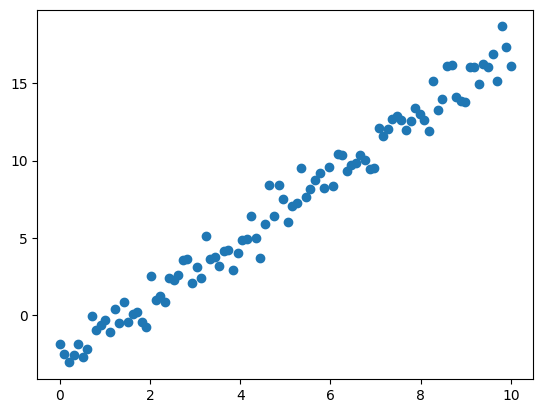

In [5]:

xs = np.linspace(0, 10, 100)
ys = xs * 2 - 3
ys += np.random.normal(0, 1, 100)

plt.scatter(xs, ys)


In [40]:

n_train = 60
x_train, y_train = xs[:n_train], ys[:n_train]
x_test, y_test = xs[n_train:], ys[n_train:]

In [37]:
class TestNetwork(nn.Module):

    @nn.compact
    def __call__(self, x):
        x = nn.Dense(4)(x)
        x = nn.Dense(1)(x)
        return x

model = TestNetwork()
rng = jax.random.key(0)
params = model.init(rng, jnp.ones([1]))
# params = model.init(rng, jnp.ones([5, 1]))

x_ex = jnp.ones(5) * 4
x_ex = x_ex.reshape(5, 1)
# x_ex = jnp.ones(5) * 4
y_ex = model.apply(params, x_ex)
print(f"Y experiment: {y_ex}")

Y experiment: [[-1.0212523]
 [-1.0212523]
 [-1.0212523]
 [-1.0212523]
 [-1.0212523]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [73]:
data_sz = 1000
xs = np.linspace(0, 10, data_sz)
ys = xs * 2 - 3
ys += np.random.normal(0, 1, data_sz)
n_train = int(0.6 * data_sz)
x_train, y_train = xs[:n_train].reshape(-1, 1), ys[:n_train].reshape(-1, 1)
x_test, y_test = xs[n_train:].reshape(-1, 1), ys[n_train:].reshape(-1, 1)

class Network(nn.Module):

    @nn.compact
    def __call__(self, x):
        x = nn.Dense(1)(x)
        # x = nn.Dense(1)(x)
        return x

model = Network()
rng = jax.random.key(0)
params = model.init(rng, jnp.ones([1]))

epochs = 400
lr = 0.02

@jax.jit
def update_params(params, learning_rate, grads):
  params = jax.tree_util.tree_map(
      lambda p, g: p - learning_rate * g, params, grads)
  return params

@jax.jit
def mse_loss(params, x, y):
    pred_y = model.apply(params, x)
    return jnp.mean(jnp.square(pred_y - y))

loss_fcn = jax.value_and_grad(mse_loss)

for e in range(epochs):
    loss_val, grads = loss_fcn(params, x_train, y_train)
    params = update_params(params, lr, grads)

    if e % 20 == 0:
        test_loss, _g = loss_fcn(params, x_test, y_test)
        print(f"Epoch {e} | Loss: {test_loss}")

print(params)


Epoch 0 | Loss: 74.25962829589844
Epoch 20 | Loss: 8.79385757446289
Epoch 40 | Loss: 6.167277812957764
Epoch 60 | Loss: 4.397270679473877
Epoch 80 | Loss: 3.2088582515716553
Epoch 100 | Loss: 2.4146032333374023
Epoch 120 | Loss: 1.8868743181228638
Epoch 140 | Loss: 1.5388613939285278
Epoch 160 | Loss: 1.3116003274917603
Epoch 180 | Loss: 1.1651171445846558
Epoch 200 | Loss: 1.072369933128357
Epoch 220 | Loss: 1.015112042427063
Epoch 240 | Loss: 0.981076717376709
Epoch 260 | Loss: 0.9620503783226013
Epoch 280 | Loss: 0.9525626301765442
Epoch 300 | Loss: 0.9489953517913818
Epoch 320 | Loss: 0.9489763379096985
Epoch 340 | Loss: 0.9509687423706055
Epoch 360 | Loss: 0.9539925456047058
Epoch 380 | Loss: 0.9574359655380249
{'params': {'Dense_0': {'bias': Array([-2.9788084], dtype=float32), 'kernel': Array([[2.0023835]], dtype=float32)}}}
